In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import japanize_matplotlib

In [8]:
# 1. データの入力 -----------------------------------------------------------
# Rのc()やdata.frame()の代わりに、Pythonのリストとpandas.DataFrameを使用します。
carbohydrate = [33, 40, 37, 27, 30, 43, 34, 48, 30, 38,
                50, 51, 30, 36, 41, 42, 46, 24, 35, 37]  # 目的変数 y
age          = [33, 47, 49, 35, 46, 52, 62, 23, 32, 42,
                31, 61, 63, 40, 50, 64, 56, 61, 48, 28]  # 説明変数 x1
weight       = [100, 92, 135, 144, 140, 101, 95, 101, 98, 105,
                108, 85, 130, 127, 109, 107, 117, 100, 118, 102] # x2
protein      = [14, 15, 18, 12, 15, 15, 14, 17, 15, 14,
                17, 19, 19, 20, 15, 16, 18, 13, 18, 14] # x3

data_dict = {
    'carbohydrate': carbohydrate,
    'age': age,
    'weight': weight,
    'protein': protein
}
data_tbl = pd.DataFrame(data_dict)

In [9]:
data_tbl

,carbohydrate,age,weight,protein
0,33,33,100,14
1,40,47,92,15
2,37,49,135,18
3,27,35,144,12
4,30,46,140,15
5,43,52,101,15
6,34,62,95,14
7,48,23,101,17
8,30,32,98,15
9,38,42,105,14


In [10]:
# 2. データの概観 ---------------------------------------------------
print("--- 2. データの構造 (Rのstr()に相当) ---")
data_tbl.info()      # Rのstr()に似た、データ構造の要約
print("\n--- 2. データの要約統計量 (Rのsummary()に相当) ---")
print(data_tbl.describe()) # Rのsummary()に似た、記述統計量の表示

--- 2. データの構造 (Rのstr()に相当) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   carbohydrate  20 non-null     int64
 1   age           20 non-null     int64
 2   weight        20 non-null     int64
 3   protein       20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes

--- 2. データの要約統計量 (Rのsummary()に相当) ---
       carbohydrate        age      weight    protein
count     20.000000  20.000000   20.000000  20.000000
mean      37.600000  46.150000  110.700000  15.900000
std        7.583916  12.774461   16.632562   2.221901
min       24.000000  23.000000   85.000000  12.000000
25%       32.250000  34.500000  100.000000  14.000000
50%       37.000000  47.500000  106.000000  15.000000
75%       42.250000  57.250000  120.250000  18.000000
max       51.000000  64.000000  144.000000  20.000000



--- 3. 散布図行列を生成中 ---


[]

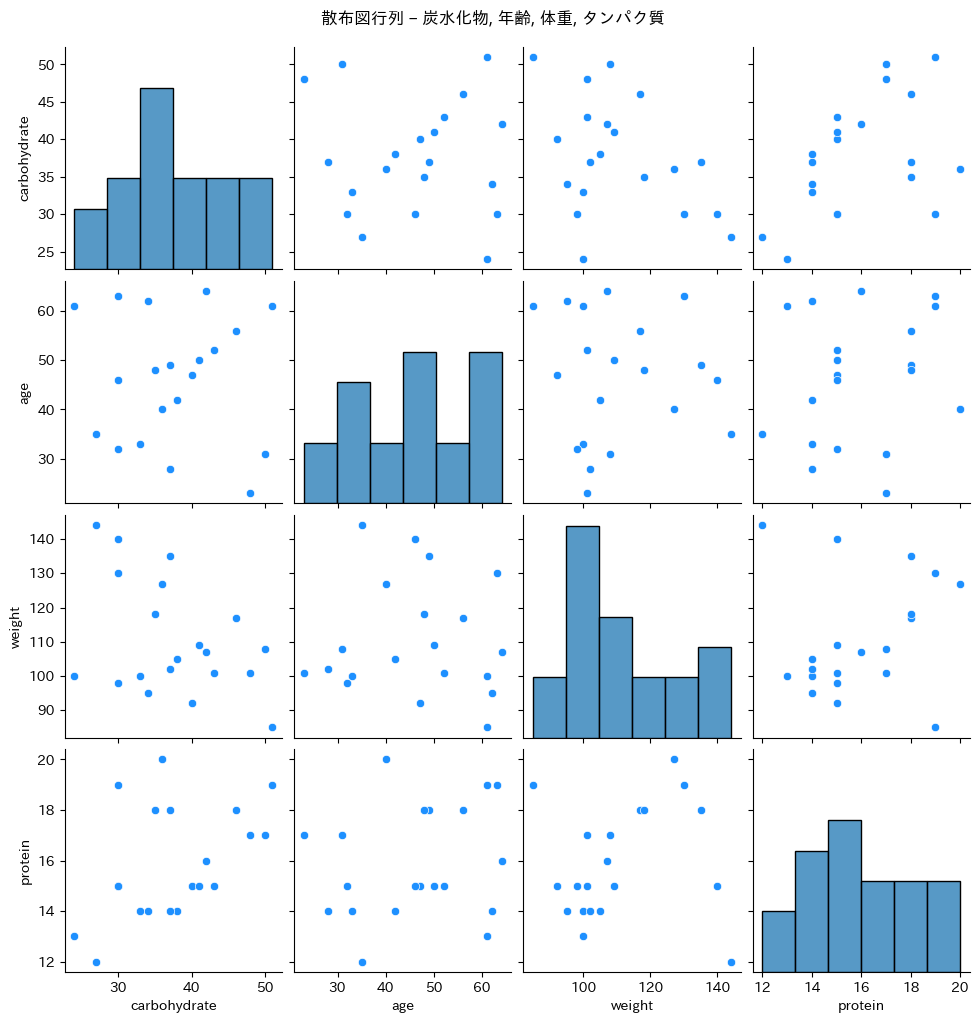

In [11]:
# 3. 散布図行列 ------------------------------------------------------
# Rのpairs()の代わりに、seabornのpairplot()を使用します。
print("\n--- 3. 散布図行列を生成中 ---")
pair_plot = sns.pairplot(data_tbl, plot_kws={'color': 'dodgerblue'})
pair_plot.fig.suptitle("散布図行列 – 炭水化物, 年齢, 体重, タンパク質", y=1.02) # yでタイトルの位置を調整
plt.savefig("scatter_plot_matrix_py.png")
plt.plot()

In [12]:
# 4. 最小二乗法によるモデル構築 -------------------------------------------
# Rのlm()の代わりに、statsmodels.formula.apiのols()を使用します。
# モデル式はRとほぼ同じ文字列で記述できます。
print("\n--- 4. 最小二乗法 (OLS) によるモデル適合結果 ---")
lm_fit = smf.ols('carbohydrate ~ age + weight + protein', data=data_tbl).fit()
print(lm_fit.summary()) # Rのsummary(lm_fit)に相当する詳細な結果を表示


--- 4. 最小二乗法 (OLS) によるモデル適合結果 ---
                            OLS Regression Results                            
Dep. Variable:           carbohydrate   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     4.934
Date:                Fri, 04 Jul 2025   Prob (F-statistic):             0.0130
Time:                        09:41:19   Log-Likelihood:                -61.837
No. Observations:                  20   AIC:                             131.7
Df Residuals:                      16   BIC:                             135.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.

In [13]:
# 5. 教科書と照合するための手計算（行列計算） -----------------------------
# 5·1 計画行列Xと目的変数yの作成
# Rのmodel.matrix()の代わりにpatsyのdmatrices()を使用
print("\n--- 5. 行列計算による結果の再現 ---")
y, X = dmatrices('carbohydrate ~ age + weight + protein', data=data_tbl, return_type='dataframe')
# NumPy配列に変換して計算
y_arr = y.values
X_arr = X.values


--- 5. 行列計算による結果の再現 ---


In [14]:
# 5·2 X'X と X'y の計算
# Rのt(X)は .T、行列積%*%は @演算子 で計算
XtX = X_arr.T @ X_arr
Xty = X_arr.T @ y_arr

In [15]:
# 5·3 最小二乗推定量: β̂ = (X'X)⁻¹ X'y
# Rのsolve(A, b)の代わりに、numpy.linalg.solve(A, b)を使用
beta_hat = np.linalg.solve(XtX, Xty)

# 5·4 残差平方和 (RSS) と不偏分散σ²
yTy = y_arr.T @ y_arr
bXty = beta_hat.T @ Xty
RSS = yTy - bXty
RSS = RSS[0, 0] # 1x1行列からスカラー値を取り出す

n_obs = X_arr.shape[0]   # 観測数 (n)
n_params = X_arr.shape[1] # パラメータ数 (p)
df_res = n_obs - n_params  # 残差の自由度 (n-p)
sigma2 = RSS / df_res      # 誤差分散 σ²

# 5·5 β̂の分散共分散行列と標準誤差
# Rのsolve(XtX)の代わりに、numpy.linalg.inv(XtX)を使用
XtX_inv = np.linalg.inv(XtX)
vcov_beta = sigma2 * XtX_inv
# Rのsqrt(diag(vcov))の代わりに、numpy.sqrt(numpy.diag(vcov))を使用
se_beta = np.sqrt(np.diag(vcov_beta))

# 5·6 計算結果の表示
print("\n--- 行列計算による再現結果 ---")
print("係数 (β̂):\n", np.round(beta_hat.flatten(), 4))
print("\n標準誤差 (se(β̂)):\n", np.round(se_beta, 3))
print(f"\n残差平方和 (RSS): {RSS:.3f}")
print(f"残差分散 (σ²): {sigma2:.3f}")


--- 行列計算による再現結果 ---
係数 (β̂):
 [36.9601 -0.1137 -0.228   1.9577]

標準誤差 (se(β̂)):
 [13.071  0.109  0.083  0.635]

残差平方和 (RSS): 567.663
残差分散 (σ²): 35.479


In [16]:
# 6. 最尤法によるモデル構築 --------------------
# Rのglm()の代わりに、statsmodels.formula.apiのglm()を使用
# family=gaussian(link="identity")は、sm.families.Gaussian(link=sm.families.links.identity())と指定
print("\n--- 6. 最尤法 (GLM) によるモデル適合結果 ---")
glm_fit = smf.glm('carbohydrate ~ age + weight + protein', data=data_tbl,
                  family=sm.families.Gaussian(link=sm.families.links.identity())).fit()
print(glm_fit.summary())


--- 6. 最尤法 (GLM) によるモデル適合結果 ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:           carbohydrate   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          35.479
Method:                          IRLS   Log-Likelihood:                -61.837
Date:                Fri, 04 Jul 2025   Deviance:                       567.66
Time:                        09:41:55   Pearson chi2:                     568.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5338
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.96

C:\Users\sk062\miniconda3\envs\Study\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [18]:
# 7. OLSとMLEの横並び比較 --------------------------------------------------
print("\n--- 7. OLSとMLEの係数比較 ---")
coef_table = pd.DataFrame({
    'OLS': lm_fit.params,
    'MLE': glm_fit.params
})
print(np.round(coef_table, 4))
# statsmodelsの結果オブジェクトからσ²を取得 (Rのsigma(lm_fit)^2に相当)
# .scaleアトリビュートがそれに該当します。
sigma2_OLS = lm_fit.scale
print(f"\nlm()の結果から取得したσ²: {sigma2_OLS:.5f}")


--- 7. OLSとMLEの係数比較 ---
               OLS      MLE
Intercept  36.9601  36.9601
age        -0.1137  -0.1137
weight     -0.2280  -0.2280
protein     1.9577   1.9577

lm()の結果から取得したσ²: 35.47893


In [19]:
# 8. オプション：影響診断 ------------------------------------------------------
# Rのrstandard, dffits, cooks.distanceに相当
print("\n--- 8. 影響診断 (RのTable 6.6に相当) ---")
influence = lm_fit.get_influence()

# 標準化残差
std_resid = influence.resid_studentized_internal
# DFFITS
dfit = influence.dffits[0]
# クックの距離
cooks_D = influence.cooks_distance[0]

influence_diag = pd.DataFrame({
    'std_resid': std_resid,
    'dffits': dfit,
    'cooks_D': cooks_D
}, index=data_tbl.index)

print(influence_diag)


--- 8. 影響診断 (RのTable 6.6に相当) ---
    std_resid    dffits       cooks_D
0   -0.875557 -0.361523  3.318320e-02
1   -0.000959 -0.000343  3.130641e-08
2    0.215464  0.101857  2.758587e-03
3    0.793565  0.775430  1.540333e-01
4    0.158955  0.086383  1.986742e-03
5    0.986615  0.304329  2.319511e-02
6   -0.316103 -0.165028  7.217096e-03
7    0.681106  0.434319  4.884358e-02
8   -1.882772 -0.866250  1.557704e-01
9    0.413880  0.128787  4.375589e-03
10   1.447513  0.652787  9.875380e-02
11   0.657594  0.473136  5.808208e-02
12  -1.445104 -0.913347  1.934194e-01
13  -1.317016 -0.863561  1.773049e-01
14   0.905662  0.240347  1.461479e-02
15   0.985166  0.423770  4.498336e-02
16   1.225227  0.460798  5.131004e-02
17  -1.687906 -1.056320  2.445669e-01
18  -0.856767 -0.286010  2.081296e-02
19  -0.172734 -0.080461  1.723161e-03
